# Logistic Regression in PyTorch 

Reference: https://towardsdatascience.com/logistic-regression-with-pytorch-3c8bbea594be


In [127]:
import torch 
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
import matplotlib.pyplot as plt 


In [66]:
N = 1000
x = torch.randn(N)
x

tensor([-1.1110e+00,  1.2477e+00,  1.5065e+00,  7.6189e-01,  8.5264e-01,
        -1.2563e-01, -1.9038e+00,  1.6720e+00,  6.3180e-01,  2.5881e-01,
         3.3149e-02,  6.0032e-03, -4.2511e-01,  1.8998e-01, -2.6254e-01,
         1.2570e+00,  8.3895e-01,  3.8643e-01,  7.2786e-01, -6.2243e-01,
        -2.8029e-01, -9.7791e-02,  2.0333e-01,  1.8681e-01, -7.0755e-01,
         2.3276e+00, -6.8964e-01, -3.2114e-01,  2.1569e-01, -8.7101e-01,
        -4.8860e-01,  3.3950e-02, -6.5066e-01,  8.5513e-01, -1.3137e+00,
         1.7007e+00,  4.2964e-01,  8.1785e-01,  3.7513e-01, -2.2630e+00,
        -1.3130e+00, -4.4191e-01, -1.2924e+00, -4.8228e-01, -6.1564e-02,
         8.8345e-01,  5.3242e-01,  5.4341e-01, -8.4463e-01, -2.1809e+00,
         3.7625e-01,  8.8431e-01, -5.9328e-02,  1.2305e+00,  3.4532e-01,
        -2.6873e-01,  2.0607e+00, -8.9122e-01, -6.1411e-01, -1.3146e+00,
         7.3265e-01, -1.3173e-01, -2.1949e+00, -1.7631e+00, -1.7001e-01,
         1.1002e+00,  4.6478e-01, -1.2753e+00,  9.4

In [67]:
y = torch.normal(1,0.5,(1,N)).reshape(N)
y

tensor([ 7.7521e-01,  5.7400e-01,  6.3649e-01,  1.7949e+00,  9.9698e-01,
         1.9423e+00,  4.9649e-01,  1.2392e+00,  1.0502e+00,  9.6447e-01,
         9.2060e-01,  9.6956e-01,  9.4072e-01,  3.6200e-01,  1.2409e+00,
         4.1318e-01,  1.0362e+00,  6.5895e-01, -1.7400e-01,  9.7230e-01,
         1.8595e+00,  6.4852e-01,  7.7182e-01,  6.5457e-01,  1.8007e+00,
         2.2738e-01,  8.2637e-01,  1.5777e+00,  6.8739e-01,  1.3767e+00,
         2.6354e-01,  8.2176e-01,  1.7027e+00,  1.4243e+00,  4.8996e-01,
         1.2977e+00,  1.4855e+00,  1.4482e+00,  1.3964e+00, -4.8401e-02,
         1.0756e+00,  1.0208e+00,  1.1100e+00,  1.2100e+00,  1.2038e+00,
         5.9449e-01,  1.2885e+00,  4.6325e-01,  1.9175e+00,  1.1070e+00,
         8.1166e-01,  1.6385e+00,  1.3097e+00,  9.9620e-01,  1.9981e-01,
         3.0831e-01,  4.8619e-01,  4.0045e-01,  1.0631e+00,  1.0134e+00,
         1.2325e+00,  1.6063e-01,  7.9254e-01,  4.8650e-01,  8.8955e-01,
         1.6049e-01,  1.9038e+00,  1.7732e+00,  8.2

In [68]:
x.shape, y.shape

(torch.Size([1000]), torch.Size([1000]))

In [69]:
x_shift =  torch.randn(N) +3
y_shift = torch.normal(5,0.5,(1,N)).reshape(N)


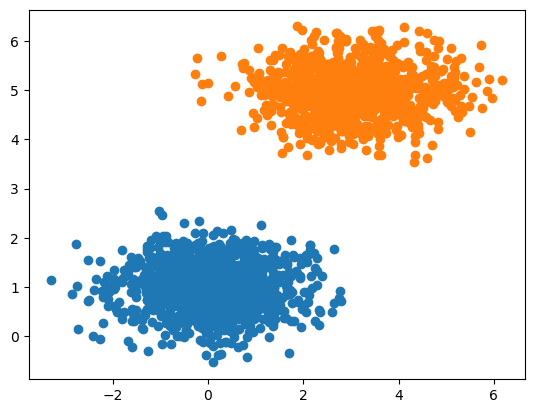

In [70]:
plt.scatter(x.cpu(), y.cpu())
plt.scatter(x_shift, y_shift)

In [71]:
x_concat = torch.cat((x,x_shift))
y_concat = torch.cat((y,y_shift))

In [82]:
# Normalize the dataset 
x_concat[:] = (x_concat - torch.min(x_concat)) / ( torch.max(x_concat ) - torch.min(x_concat))
y_concat[:] = (y_concat - torch.min(y_concat)) / ( torch.max(y_concat ) - torch.min(y_concat))

In [96]:
X = torch.stack((x_concat, y_concat), dim=1)
X

tensor([[0.2301, 0.1917],
        [0.4795, 0.1622],
        [0.5068, 0.1714],
        ...,
        [0.6035, 0.8546],
        [0.5830, 0.8053],
        [0.6295, 0.8619]])

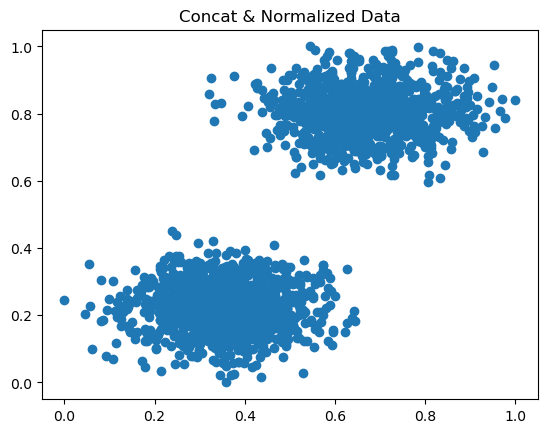

In [97]:
plt.title('Concat & Normalized Data')
plt.scatter(X[:,0],X[:,1])

In [78]:
# Devise the logistic Regression Model 

# Hyper-params 
# input_size = 1000
# num_classes = 2 

class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        pass

In [104]:
# Define the Logistic Regression mode
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        out = self.linear(x)
        return out

# Set the hyperparameters
input_size = 2   # Number of input features
num_classes = 2    # Number of classes
learning_rate = 0.01
num_epochs = 1000

# Create the Logistic Regression model
model = LogisticRegression(input_size, num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Example data and labels
data = X  # Example input data
labels = torch.randint(0, num_classes, (2000,))   # Example labels

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(data)
    loss = criterion(outputs, labels)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress
    if (epoch+1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/1000], Loss: 0.7006
Epoch [2/1000], Loss: 0.7005
Epoch [3/1000], Loss: 0.7004
Epoch [4/1000], Loss: 0.7003
Epoch [5/1000], Loss: 0.7001
Epoch [6/1000], Loss: 0.7000
Epoch [7/1000], Loss: 0.6999
Epoch [8/1000], Loss: 0.6998
Epoch [9/1000], Loss: 0.6997
Epoch [10/1000], Loss: 0.6996
Epoch [11/1000], Loss: 0.6995
Epoch [12/1000], Loss: 0.6994
Epoch [13/1000], Loss: 0.6993
Epoch [14/1000], Loss: 0.6992
Epoch [15/1000], Loss: 0.6991
Epoch [16/1000], Loss: 0.6990
Epoch [17/1000], Loss: 0.6989
Epoch [18/1000], Loss: 0.6988
Epoch [19/1000], Loss: 0.6987
Epoch [20/1000], Loss: 0.6986
Epoch [21/1000], Loss: 0.6985
Epoch [22/1000], Loss: 0.6984
Epoch [23/1000], Loss: 0.6984
Epoch [24/1000], Loss: 0.6983
Epoch [25/1000], Loss: 0.6982
Epoch [26/1000], Loss: 0.6981
Epoch [27/1000], Loss: 0.6980
Epoch [28/1000], Loss: 0.6979
Epoch [29/1000], Loss: 0.6979
Epoch [30/1000], Loss: 0.6978
Epoch [31/1000], Loss: 0.6977
Epoch [32/1000], Loss: 0.6976
Epoch [33/1000], Loss: 0.6976
Epoch [34/1000], Lo

In [111]:
for name, param in model.named_parameters():
        print(param, name)

Parameter containing:
tensor([[-0.3980,  0.6276],
        [-0.2074,  0.6026]], requires_grad=True) linear.weight
Parameter containing:
tensor([0.5853, 0.5466], requires_grad=True) linear.bias


In [117]:
params = [ ] 
for param in model.parameters():
    params.append(param)
     

In [123]:
X_check = torch.matmul(X,params[0]) + params[1]

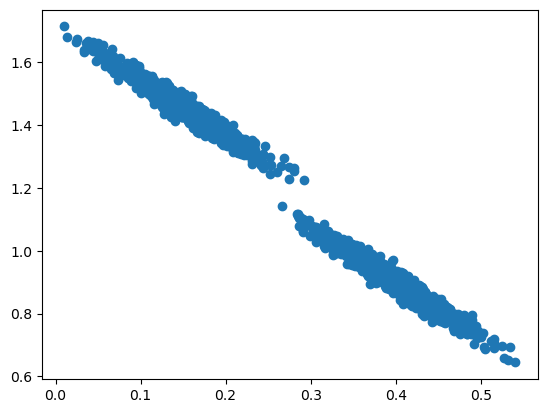

In [126]:
plt.scatter(X_check[:,0].detach().numpy(), X_check[:,1].detach().numpy())